In [16]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.read_csv("breast-cancer-wisconsin.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
df = df.rename(columns={0:'id', 1:'clump',2:'size',3:'shape',4:'marginal',5:'epithelial',6:'bare',7:'bland',8:'normal',9:'mitoses',10:'class'})
df.head()

,id,clump,size,shape,marginal,epithelial,bare,bland,normal,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


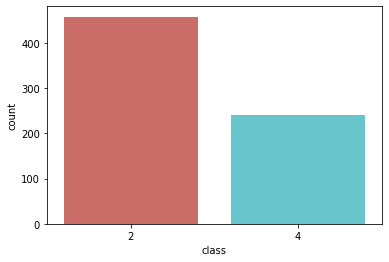

In [18]:
sn.countplot(x=df['class'], palette='hls')
plt.show()

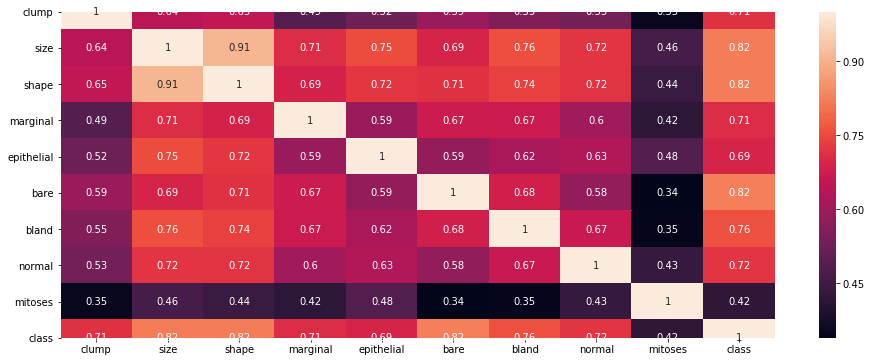

In [46]:
data = df.loc[:, df.columns != 'id']
data = data[data['bare'] != '?']
data['bare'] = pd.to_numeric(data['bare'])
crmax = data.corr()
sn.heatmap(crmax, annot=True)
plt.rcParams["figure.figsize"]=(16,8)
plt.show()

Text(0.5, 1, 'Features correlating with Class')

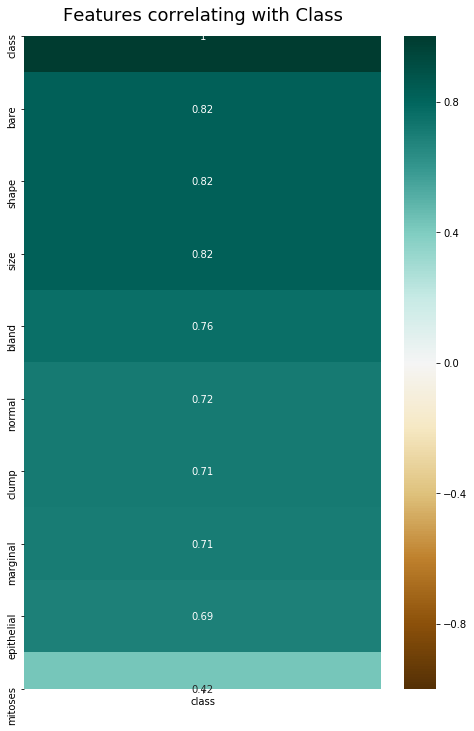

In [21]:
plt.figure(figsize=(8,12))
heatmap = sn.heatmap(data.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features correlating with Class', fontdict={'fontsize':18}, pad=16)


In [30]:
data.describe()

,clump,size,shape,marginal,epithelial,bare,bland,normal,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


(array([150., 160., 161.,  39.,  34.,   9.,  71.,  28.,  11.,  20.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

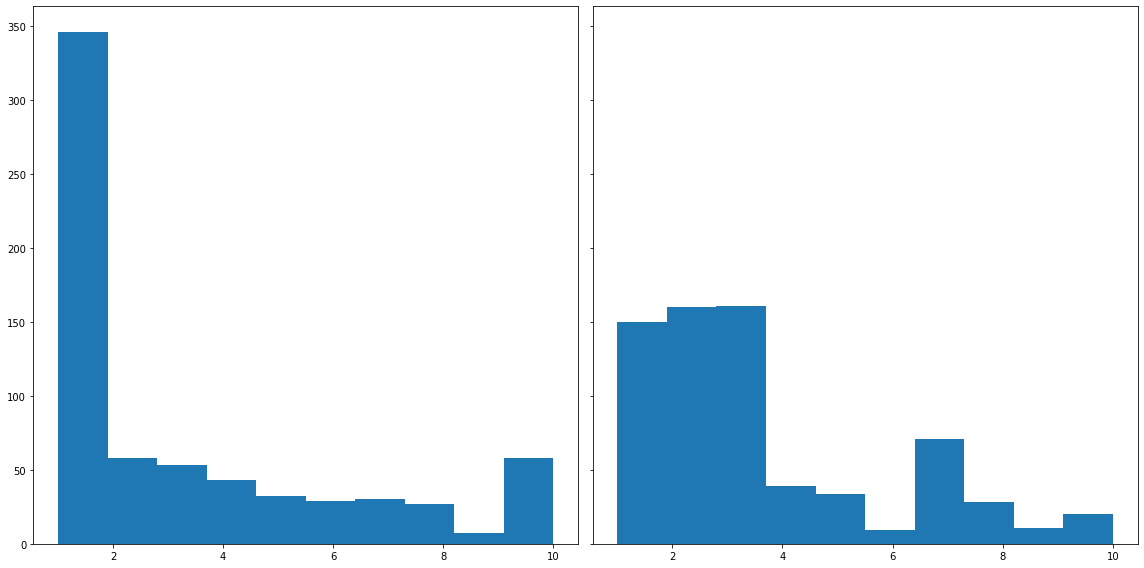

In [47]:
plt.rcParams["figure.figsize"]=(16,8)
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)
axs[0].hist(data['shape'])
axs[1].hist(data['bland'])

In [48]:
from sklearn.model_selection import train_test_split
target = data['class']
features = data.loc[:, data.columns != 'class']
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size=0.2, random_state=42 )

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(train_features, train_labels)

rfc_predict = rfc.predict(test_features)
rfc.fit

<bound method BaseForest.fit of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(test_labels, rfc_predict))
print(accuracy_score(test_labels, rfc_predict))

[[77  2]
 [ 3 55]]
0.9635036496350365


In [80]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num =10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,110,num=10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(train_features, train_labels)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=20,
                                                    n_jobs=None,
  

In [86]:
print(rf_random.best_params_, rf_random.best_score_)

{'n_estimators': 266, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 54, 'bootstrap': True} 0.9706959706959707


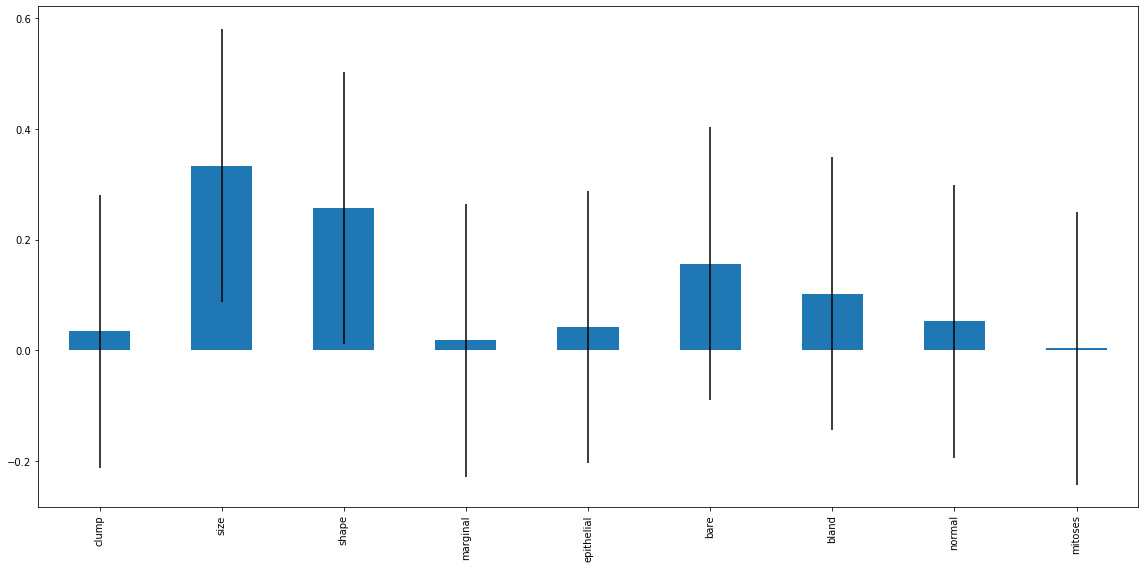

In [90]:
import numpy as np
rfbest = RandomForestClassifier(n_estimators=266, min_samples_split= 10, min_samples_leaf=4, max_features='auto', max_depth=54, bootstrap= True)
rfbest.fit(train_features, train_labels)

names = features.columns
importances = rfbest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfbest.estimators_])
forest_importances = pd.Series(importances, index = names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
fig.tight_layout()

In [52]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(random_state=0, solver='lbfgs').fit(train_features, train_labels)
lr_predict = lr.predict(test_features)
print(accuracy_score(test_labels, lr_predict))

0.9562043795620438


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10,1,0.1,0.01]
lggrid = dict(solver = solvers, penalty = penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search=GridSearchCV(estimator=model, param_grid=lggrid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(train_features, train_labels)

In [85]:
print(grid_result.best_score_, grid_result.best_params_)

0.9688644688644689 {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


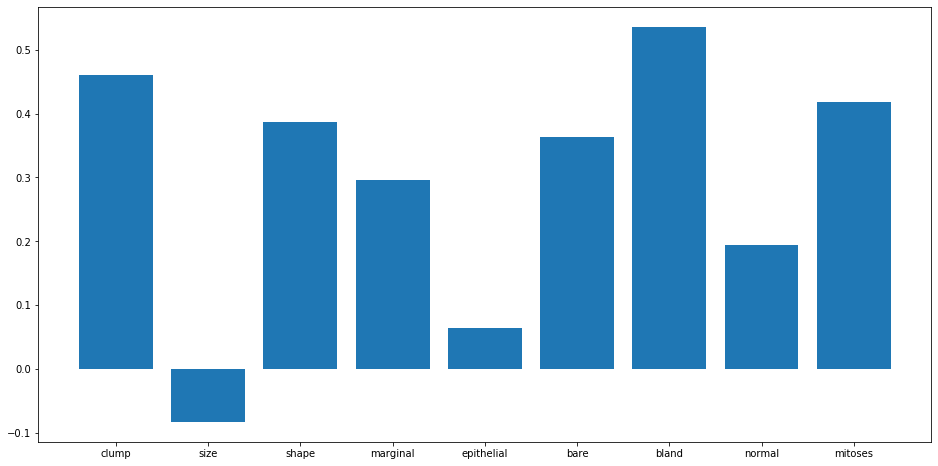

In [95]:
lgbest = LogisticRegression(C= 10, penalty='l2', solver= 'newton-cg')
lgbest.fit(train_features, train_labels)

lgimportances = lgbest.coef_[0]
plt.bar([x for x in range(len(lgimportances))], lgimportances)
plt.xticks(np.arange(len(names)), names)
plt.show()